In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Razaque\Downloads\carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
dummies=pd.get_dummies(df['Car Model'])
dummies_int=(dummies==1).astype(int)
dummies_int

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [4]:
merged=pd.concat([df,dummies_int],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [5]:
final=merged.drop(['Mercedez Benz C class','Car Model'],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


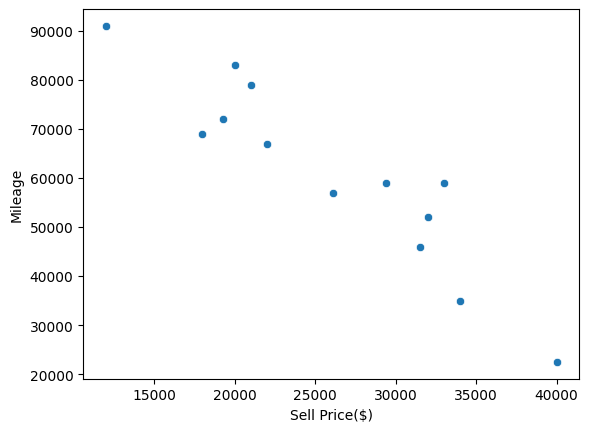

In [6]:
sns.scatterplot(x='Sell Price($)',y='Mileage',data=df)
plt.show()

In [7]:
X=final.drop('Sell Price($)',axis='columns')
y=final['Sell Price($)']

In [8]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [9]:
price_pred=reg.predict([[53000,2,1,0]])
print(f"Price of Mercedez Benz is {price_pred}")

Price of Mercedez Benz is [34241.70697347]


C:\Users\Razaque\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
accu=reg.score(X,y)
print(f'Accuracy of the Car price model is {accu*100:.2f}')

Accuracy of the Car price model is 94.17


In [11]:
import joblib as j
j.dump(price_pred,'Car Price prediction model ')

['Car Price prediction model ']